`ASAD ASHRAF KAREL`

# Study of Machine Learning models with practical scenario

-------------------------

In [1]:
import pandas as pd
house = pd.read_csv('house.csv')
house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


In [2]:
house.shape

(4766, 10)

`House dataset has 4766 entries. Let's seperate the data into train and test format.`

In [3]:
house_train = house.iloc[:3000,:] ; house_test = house.iloc[3000:,:]

In [4]:
house_train.shape , house_test.shape , (house_train.shape[0] + house_test.shape[0])

((3000, 10), (1766, 10), 4766)

### Unkown data for the machine:

In [5]:
house_test_data = house_test.drop('Price', axis=1)
house_test_data.shape[1]

9

---------------

In [6]:
import scipy.stats as st
slope, intercept,  rvalue, pvalue, stderr = st.linregress(house.Price, house.Bedroom)
print( 'Slope:',slope,'\n','Intercept:',intercept,'\n', 
      'R_value:', rvalue, '\n', 'P_value:',pvalue,  '\n','Std_Error:',stderr ) 

Slope: -4.25018464029854e-08 
 Intercept: 2.9845844316410624 
 R_value: -0.025258749153968536 
 P_value: 0.08123071586090312 
 Std_Error: 2.4370895979742685e-08


`This is the simplest inference we got from the machine, that it gave p-value > 5% (0.05), which indicates the feature Bedroom is not contributing good with the house price. Hence we go with another attributes. This is a simpler LinearRegression model.`

-------------------

### Exploratory Data Analysis :

In [7]:
house.dtypes

Rooms           int64
Type           object
Price           int64
Method         object
Regionname     object
Bathroom        int64
Car             int64
Landsize        int64
Distance      float64
Bedroom         int64
dtype: object

`These are the feature types we are about work on correspondingly.`

`Lets's deal with categorical variables.`

In [8]:
print('Type:', pd.DataFrame(house.Type.value_counts()))
print('Method:', pd.DataFrame(house.Method.value_counts()))

Type:    Type
h  3353
u   920
t   493
Method:     Method
S     3088
SP     662
PI     534
VB     446
SA      36


`We see here these categorical features do not seem to be good for prediction, hence we remove them for a while from the data.`

In [9]:
house1 = house.drop(['Type', 'Method', 'Regionname'], axis=1)
house_train = house1.iloc[:3000,:] ; house_test = house1.iloc[3000:,:]

**Dealing with null values:**

In [10]:
house.isnull().sum()

Rooms         0
Type          0
Price         0
Method        0
Regionname    0
Bathroom      0
Car           0
Landsize      0
Distance      0
Bedroom       0
dtype: int64

`We see here no null values.`

**WE ARE GOOD TO GO...**

**Checking for outliers:**

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,8]
house.drop(['Price','Landsize'],axis=1).boxplot()
plt.show()

<Figure size 1500x800 with 1 Axes>

`Price is a predicted feature and Landsize was a feature having high range of the values, that’s why we didn’t consider that feature as well. We can now give an inference that, data is giving the outliers, but the quantity is not much, hence we can keep it as it is, the reason is, we can see the features are normally distributed.`

-------------

## Train, Test Splitting:

In [12]:
from sklearn.model_selection import train_test_split

X = house_train.drop('Price', axis=1) ; y = house_train.Price
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, train_size=0.80, test_size=0.20, random_state=42)

print('Train_Test_Data:')
print('Train Data:',Xtrain.shape,'\n',ytrain.shape)
print('Test Data:',Xtest.shape,'\n',ytest.shape)

Train_Test_Data:
Train Data: (2400, 6) 
 (2400,)
Test Data: (600, 6) 
 (600,)


`We have given 80% data for training and 20% data for testing.`

--------------------------

### Let's make a fundamental model for the analysis:

In [13]:
house_train.columns

Index(['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Bedroom'], dtype='object')

In [14]:
import statsmodels.formula.api as sm

sm_model = sm.ols('Price~Bedroom+Distance+Landsize+Car+Bathroom+Rooms', 
                  data = house_train).fit()
sm_model.summary()

C:\Users\hi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     102.7
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          7.74e-118
Time:                        23:35:21   Log-Likelihood:                -44126.
No. Observations:                3000   AIC:                         8.827e+04
Df Residuals:                    2993   BIC:                         8.831e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.371e+05   7.38e+04      3.211      0.001    9.23e+04    3.82e+05
Bedroom    -7440.3457   9817.004     -0.758      0.449   -2.67e+04    1.18e+04
Distance    -709.8338   2556.160     -0.278      0.781   -5721.843    4302.175
Landsize      -6.9167      7.460     -0.927      0.354     -21.545       7.711
Car        -1.165e+04   1.25e+04     -0.930      0.353   -3.62e+04    1.29e+04
Bathroom   -1.012e+04   1.47e+04     -0.687      0.492    -3.9e+04    1.88e+04
Rooms       2.846e+05   1.15e+04     24.638      0.000    2.62e+05    3.07e+05
==============================================================================
Omnibus:                     1553.946   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14414.830
Skew:                           2.278   Prob(JB):                         0.00
Kurtosis:                      12.724   Cond. No.                     1.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`We have complete information about the model regarding the data. We can see the AdjR2 value which is 0.169 which is very far from 1 and we say our model is not so good corresponding to all the features.`

`Let’s reduce some features and see how we get the model goodness.`

In [15]:
import statsmodels.formula.api as sm

sm_model_1 = sm.ols('Price~Distance+Landsize+Bathroom', 
                  data = house_train).fit()
sm_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.494
Date:                Sun, 07 Feb 2021   Prob (F-statistic):              0.214
Time:                        23:35:21   Log-Likelihood:                -44405.
No. Observations:                3000   AIC:                         8.882e+04
Df Residuals:                    2996   BIC:                         8.884e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.109e+06   6.06e+04     18.317      0.000     9.9e+05    1.23e+06
Distance   -1129.3137   2803.153     -0.403      0.687   -6625.612    4366.985
Landsize      -8.2613      8.157     -1.013      0.311     -24.255       7.732
Bathroom   -2.691e+04   1.53e+04     -1.764      0.078   -5.68e+04    3005.815
==============================================================================
Omnibus:                     1638.602   Durbin-Watson:                   1.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14621.218
Skew:                           2.460   Prob(JB):                         0.00
Kurtosis:                      12.631   Cond. No.                     7.86e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`We are observing here a tremendous change in model behavior. We can see that the AdjR2 values has fell down to 0, which we cannot remove the features from the data.`

`Let’s see the observation of features from the above base model:`
    
`Coefficient values are showing that the feature impact exists on the dependent variable but the impact is negative  for all the time.`

`This was the basic fundamental structure of the data what we have studied.` 

---------------------------

`This seems to be not good for the model. There is a technique in Simple Regression which automatically selects the best features for the model. Let’s use the technique to get the good model.`

`The technique is called is Sequential Feature Selector (SFS) technique, which gives us the best features for the model among all.`

`There are several techniques along the SLR, but we randomly chose this technique for our model.` 

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

fs = sfs(estimator=LR, k_features="best", forward = True, 
         verbose = 2, scoring = "r2", cv = 14)
sfsmodel = fs.fit(X, y)
print("Best_Features: ", sfsmodel.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished

[2021-02-07 23:35:21] Features: 1/6 -- score: 0.15647107586208686[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished

[2021-02-07 23:35:22] Features: 2/6 -- score: 0.15663215197313912[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished

[2021-02-07 23:35:22] Features: 3/6 -- score: 0.1568961477484945[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

Best_Features:  ('Rooms', 'Bathroom', 'Landsize')


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2021-02-07 23:35:22] Features: 6/6 -- score: 0.1559015200342915

**Model after the best features eliminations:**

In [17]:
import statsmodels.formula.api as sm

sm_model_sfs = sm.ols('Price~Rooms+Bathroom+Landsize', 
                  data = house_train).fit()
sm_model_sfs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     204.9
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          6.96e-121
Time:                        23:35:22   Log-Likelihood:                -44127.
No. Observations:                3000   AIC:                         8.826e+04
Df Residuals:                    2996   BIC:                         8.829e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.886e+05   4.41e+04      4.276      0.000    1.02e+05    2.75e+05
Rooms       2.849e+05   1.15e+04     24.688      0.000    2.62e+05    3.08e+05
Bathroom   -1.456e+04   1.39e+04     -1.046      0.296   -4.19e+04    1.27e+04
Landsize      -7.5106      7.435     -1.010      0.313     -22.090       7.068
==============================================================================
Omnibus:                     1554.604   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14408.381
Skew:                           2.280   Prob(JB):                         0.00
Kurtosis:                      12.720   Cond. No.                     6.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`We see here the AdjR2 value is quite good than that of sfsmodel. This is the best point of the libraries and inbuilt functions which are helping to work simpler into the steam. Even we see that the coefficient values show the impact. Moreover Rooms shows now the positive impact on the dependent variable. Which seems Rooms is contributing very much good for the price. Since P>|t| < 0.05, which proves our statement true for Rooms.`

### Why Rooms is best?

`GradientBoostingRegressor` 

In [18]:
from sklearn.ensemble import GradientBoostingRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
gbm = GradientBoostingRegressor()
fs = sfs(estimator=gbm, k_features="best", forward = True, 
         verbose = 2, scoring = "r2", cv = 14)
sfsmodel = fs.fit(X, y)
print("Features: ", sfsmodel.k_feature_names_)
print("R2 Score: ", sfsmodel.k_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.9s finished

[2021-02-07 23:35:29] Features: 1/6 -- score: 0.15416475560512088[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    5.8s finished

[2021-02-07 23:35:34] Features: 2/6 -- score: 0.13927154673278655[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    5.4s finished

[2021-02-07 23:35:40] Features: 3/6 -- score: 0.13654745959034878[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Features:  ('Rooms',)
R2 Score:  0.15416475560512088


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished

[2021-02-07 23:35:50] Features: 6/6 -- score: 0.12088063708346179

### Prediction using the model:

In [19]:
house_test_data.head(5)

,Rooms,Type,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
3000,4,h,S,Eastern Metropolitan,1,1,245,17.4,4
3001,4,h,S,Southern Metropolitan,1,2,590,21.4,1
3002,2,u,S,Southern Metropolitan,2,2,602,20.9,2
3003,3,t,S,Southern Metropolitan,1,1,172,18.6,2
3004,2,h,S,Southern Metropolitan,1,2,258,25.3,3


In [20]:
predicted_values = sm_model_sfs.predict(house_test)

house_test_data['Predicted_Price'] = predicted_values

In [21]:
house_test_data.head()

,Rooms,Type,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Predicted_Price
3000,4,h,S,Eastern Metropolitan,1,1,245,17.4,4,1.311961e+06
3001,4,h,S,Southern Metropolitan,1,2,590,21.4,1,1.309370e+06
3002,2,u,S,Southern Metropolitan,2,2,602,20.9,2,7.248364e+05
3003,3,t,S,Southern Metropolitan,1,1,172,18.6,2,1.027568e+06
3004,2,h,S,Southern Metropolitan,1,2,258,25.3,3,7.419804e+05


**Error Difference in the price value:**

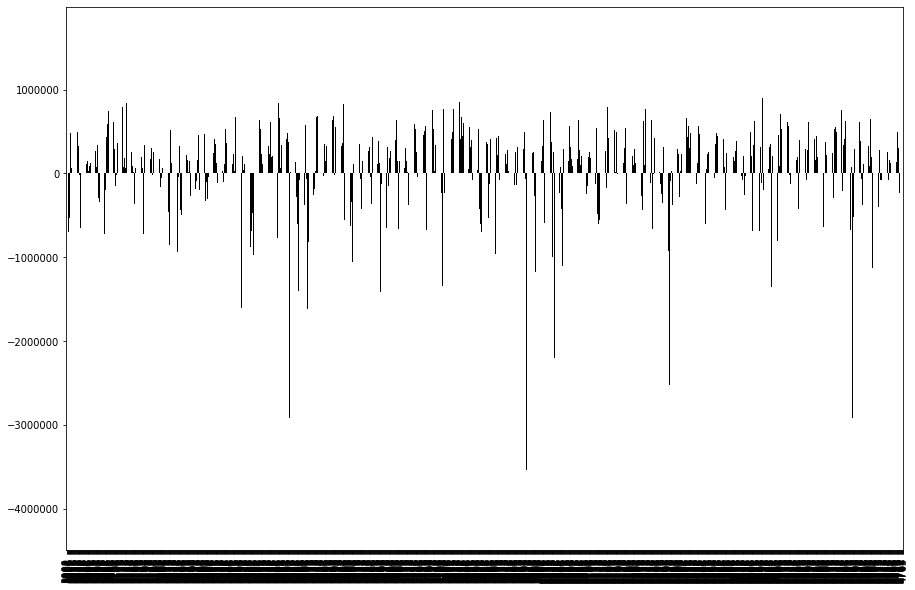

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]

(house_test_data.Predicted_Price - house_test.Price).plot(kind='bar', color='black')
plt.show()

In [23]:
(house_test_data.Predicted_Price - house_test.Price).max()

1693684.8992342816

--------------

`We see a drastic change in our predicted and actual data. We see a huge increase and decrease in the data value(s) of price prediction feature. Moreover we see here the change into the price is almost 1693684.90, which is literally very much high indeed in millions.`

`Now the question comes in mind, how to solve such issues for this scenario without an issue of affordance. We wish to reduce error in our model to get good prediction, because 1.6M price difference is really unaffordable. Hence we approach two ways:`

•	`Assumption:` If the data does not follow such assumption for the model, Linear Regression is not going to work for good predictions.

•	`High models:` If assumptions are not met, ultimately we go with some other models, which deal with such issues. 

#### Let’s see, what assumption we actually consider while working specifically for Linear Regression. 


### Assumptions:

**1) LINEARITY:**

#### Hypothesis:
* H0: Data is normal.
* H1: Data is not normal.

In [24]:
import statsmodels.api as sm
crit, pvalue = sm.stats.diagnostic.linear_rainbow(sm_model_sfs)
print('pvalue:',pvalue)
print()
if pvalue > 0.05:
    print('We are failed to reject our null hypothesis, hence we claim that Data is normal.')
else:
    print('We accept alternate hypothesis, hence we claim that Data is not normal.')

pvalue: 0.9617697656303916

We are failed to reject our null hypothesis, hence we claim that Data is normal.


In [25]:
import statsmodels.api as sm
crit, pvalue = sm.stats.diagnostic.linear_rainbow(sm_model)
print('pvalue:',pvalue)
print()
if pvalue > 0.05:
    print('We are failed to reject our null hypothesis, hence we claim that Data is normal.')
else:
    print('We accept alternate hypothesis, hence we claim that Data is not normal.')

pvalue: 0.9572083332642494

We are failed to reject our null hypothesis, hence we claim that Data is normal.


-------------------

**2) NORMALITY:**

In [26]:
import scipy.stats as st
st.shapiro(sm_model_sfs.resid)

(0.8395354151725769, 0.0)

In [27]:
st.jarque_bera(sm_model_sfs.resid)

(14408.38138175497, 0.0)

-------

In [28]:
import scipy.stats as st
st.shapiro(sm_model.resid)

(0.8399116396903992, 0.0)

In [29]:
st.jarque_bera(sm_model.resid)

(14414.829935348196, 0.0)

`We tried with shapiro as well as jarque_bera to check the normality, but unfortunately we observed that our p-value is tremendously down from 5%, which is indeed 0.0 which we can say the residuals are not normal. `

`Conclusion1:` A simple conclusion, we can say that, we were not getting model with good accuracy just because our data does not follow Normality rule. 

### Residual plot:

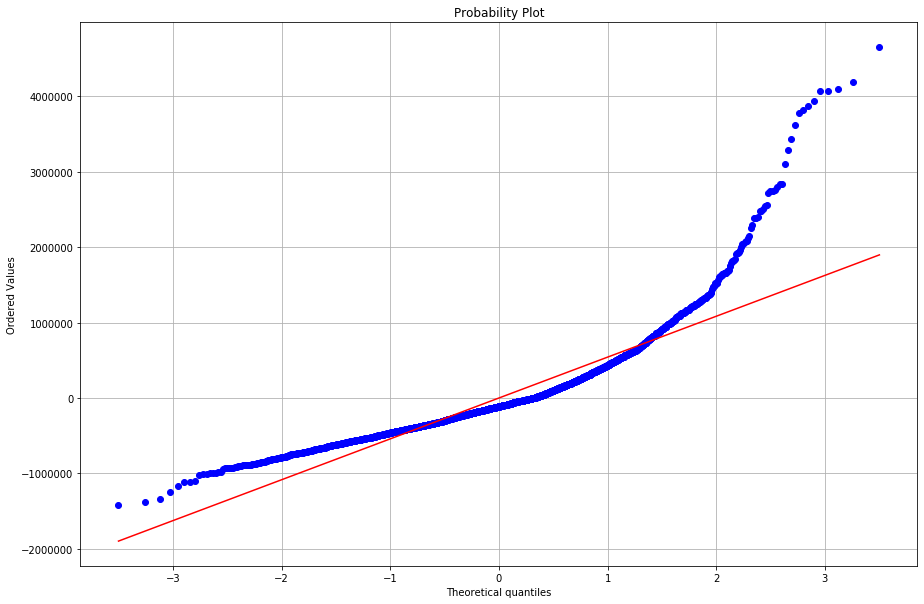

In [30]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(sm_model_sfs.resid, plot = plt)
plt.grid()
plt.show()

`We have a better idea about the residual normality that, residuals are not normally distributed; graph shows a huge variance into the data.`

----------

**3) MULTICOLLINEARITY:**

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Xx = house1.drop('Price', axis=1)

lisT = []

for i in range(Xx.shape[1]):
    lisT.append(variance_inflation_factor(Xx.values, i))

pd.DataFrame({'columns':Xx.columns, 'VIF':lisT}).sort_values(by='VIF')

,columns,VIF
3,Landsize,1.154244
2,Car,4.018260
1,Bathroom,5.653603
5,Bedroom,7.277079
0,Rooms,8.923850
4,Distance,12.042427


`We can see that, Distance is a feature which is having high VIF value; hence we declare that it has strong correlation with some other feature(s). The thing is now; we will remove this feature to make our model good. Even we have observed in sm_model_1 that Distance is not a good feature for the model making thou in feature elimination technique it was indeed removed as insignificant feature. `

----------------------

**4) AUTOCORRELATION:**

#### Hypothsis:
* H0: Residulas have no autocorrelation.
* H1: We reject null hypothsis.

In [32]:
from statsmodels.stats.stattools import durbin_watson

ACV = durbin_watson(sm_model.resid).round(1)

In [33]:
from statsmodels.stats.stattools import durbin_watson

ACV = durbin_watson(sm_model_sfs.resid).round(1)

In [34]:
print('TStat_value:',ACV)
print()
if ACV <= 2.5 and ACV >= 1.5:
    print('Data is normal and no autocorrelation in residuals.')
else:
    print('We reject our null hypothesis. We claim that the data is not normal. It has the autocorrelations in residuals.')

TStat_value: 1.4

We reject our null hypothesis. We claim that the data is not normal. It has the autocorrelations in residuals.


**Here we observed a value 1.4. Before that, let me explain you the thumb rule for this test:**

•	If test stats value is in range of (1.5-2.5), then we consider it to be normal. A value beyond this is a sign of Autocorrelation.

•	Inference: If it is between this range of (1.5-2.5), we fail to reject null hypothesis.

•	In the model (sm_model_sfs) we have a value of Durbin-Watson which is there what we obtained by the test. 


`Conclusion2:` Since this assumption is also not met for the data. And we face the autocorrelation in the data. Hence again we can say that, this would be the reason our model was not giving a good accuracy.

---------------------

C:\Users\hi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


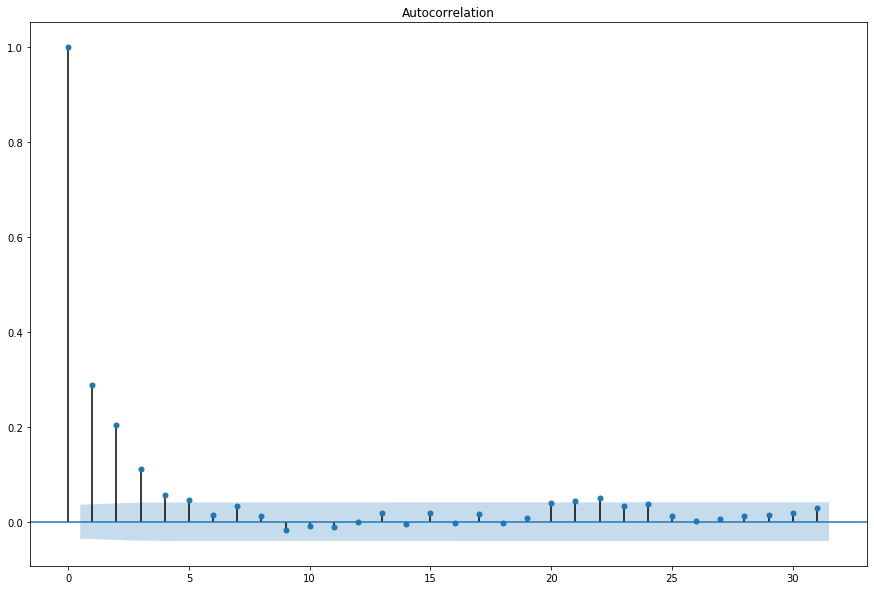

In [35]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(sm_model_sfs.resid, lags=31 , alpha=0.05)
acf.show()

-------------

**5) Heteroskedasticity:**

In [36]:
import statsmodels.stats.api as ssa

predictors = house_train.drop('Price', axis =1 )
print(predictors.shape, sm_model.resid.shape)

teststats, pvalue, ftest, f_pvalue = ssa.het_breuschpagan(sm_model.resid, predictors) 
print('pvalue:',pvalue)
print()
if pvalue>0.05:
    print('Data is not suffering from heteroskedasticity and there is no autocorrel of errors.')
else:
    print('Data is suffering from heteroskedasticity and there is autocorrel of errors.')

(3000, 6) (3000,)
pvalue: 6.844772597163193e-72

Data is suffering from heteroskedasticity and there is autocorrel of errors.


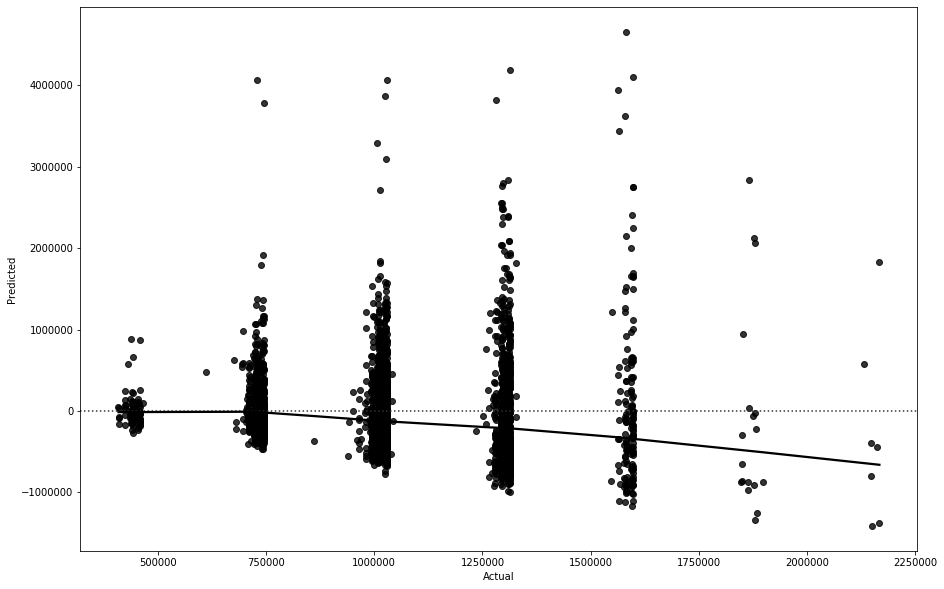

We just here fitted the LOWESS object to see the behaviour of the residuals.
We see a little negative relation in actual with fitted values, which seems to be higher error.


In [37]:
import seaborn as sns ; import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15,10]

res = sm_model_sfs.resid ; fit = sm_model_sfs.fittedvalues

sns.residplot(fit, res, color='black', lowess=True)
plt.xlabel('Actual') ; plt.ylabel('Predicted')
plt.show()

print('We just here fitted the LOWESS object to see the behaviour of the residuals.')
print('We see a little negative relation in actual with fitted values, which seems to be higher error.')

**Again we failed in this assumption, that our data is suffering from the heteroskedasticity. Even plot shows a huge funnel like shape to the residuals and fittings, which means data is quite scattered,**

`Conclusion3:` Since our data is quite spread and has not equal variance at every instance (Non-Homoskedastic/Heteroskedastic) in nature, hence again we are inappropriate to use here a simple linear regression. 


---------------

#### Out of 5 assumptions it did not meet 3 assumptions. Hence we conclude that, such data will not give us a good model with simple linear regression. That's why we were having 15-16% accuracy in our model. 

Refer: sfsmodel, sm_model_sfs

--------------

### What to do now?

### 1) Let's go with Lasso and Ridge Regression:

In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [39]:
x = house_test_data.drop(['Regionname','Type','Method'], axis=1)
Y = house_test_data.Predicted_Price

X1train, X1test, y1train, y1test = train_test_split(x,Y)

lasso = Lasso(alpha=0.5, normalize=True)
lasso_predicted = lasso.fit(X1train, y1train).predict(x)

In [40]:
house_test_data['Lasso_Predicted'] = lasso_predicted

In [41]:
house_test_data.head()

,Rooms,Type,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Predicted_Price,Lasso_Predicted
3000,4,h,S,Eastern Metropolitan,1,1,245,17.4,4,1.311961e+06,1.311926e+06
3001,4,h,S,Southern Metropolitan,1,2,590,21.4,1,1.309370e+06,1.309346e+06
3002,2,u,S,Southern Metropolitan,2,2,602,20.9,2,7.248364e+05,7.248743e+05
3003,3,t,S,Southern Metropolitan,1,1,172,18.6,2,1.027568e+06,1.027549e+06
3004,2,h,S,Southern Metropolitan,1,2,258,25.3,3,7.419804e+05,7.419832e+05


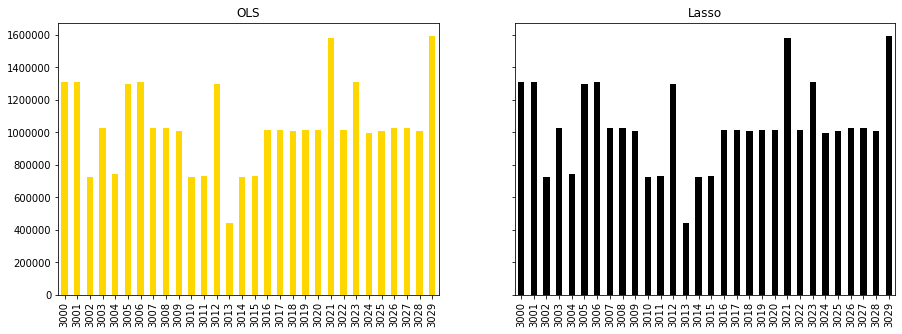

In [42]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
house_test_data.Predicted_Price[0:30].plot(kind='bar', color='gold', ax=axes[0], title='OLS')
house_test_data.Lasso_Predicted[0:30].plot(kind='bar', color='black', ax=axes[1], title='Lasso')
plt.show()

### Error Terms:

In [43]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
RMSE1 = np.sqrt(mean_squared_error(house_test.Price, house_test_data.Predicted_Price))
RMSE2 = np.sqrt(mean_squared_error(house_test.Price, house_test_data['Lasso_Predicted']))
print('RMSE for OLS model =',RMSE1)
print('RMSE for LASSO model =',RMSE2)

RMSE for OLS model = 550175.9084392181
RMSE for LASSO model = 550174.0407873997


We observe approximately the same error in both the model.

Let's approach to the next model.

### Ridge:

In [44]:
ridge = Ridge(alpha=0.5, normalize=True)
ridge_predicted = ridge.fit(X1train, y1train).predict(x)

In [45]:
house_test_data['Ridge_Predicted'] = ridge_predicted

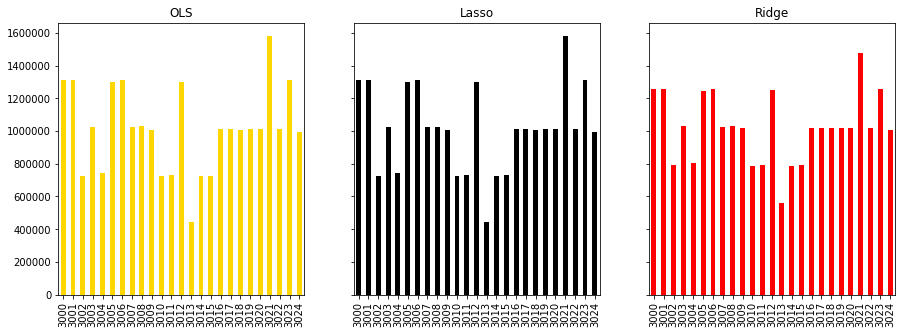

In [46]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,5))
house_test_data.Predicted_Price[0:25].plot(kind='bar', color='gold', ax=axes[0], title='OLS')
house_test_data.Lasso_Predicted[0:25].plot(kind='bar', color='black', ax=axes[1], title='Lasso')
house_test_data.Ridge_Predicted[0:25].plot(kind='bar', color='red', ax=axes[2], title='Ridge')
plt.show()

In [47]:
import numpy as np
RMSE1 = np.sqrt(mean_squared_error(house_test.Price, house_test_data.Predicted_Price))
RMSE3 = np.sqrt(mean_squared_error(house_test.Price, house_test_data['Ridge_Predicted']))
print('RMSE for OLS model =',RMSE1)
print('RMSE for RIDGE model =',RMSE3)

RMSE for OLS model = 550175.9084392181
RMSE for RIDGE model = 549239.3830438689


We observed a good difference in L2 Regularization than that of OLS and Norm.

We can approach to this model, but for the sake of accuracy we would approach to the some another models.

### BaggingRegression:

In [48]:
house_test_data1 = house_test_data[['Rooms','Bathroom','Car','Landsize','Distance','Bedroom','Predicted_Price']]

In [49]:
from sklearn.ensemble import BaggingRegressor
Bagg = BaggingRegressor()

x1 = house_test_data1.drop('Predicted_Price', axis=1)
y1 = house_test_data1.Predicted_Price

bagg_predicted = Bagg.fit(x1,y1).predict(x1)

In [50]:
house_test_data['Bagg_Predicted'] = bagg_predicted

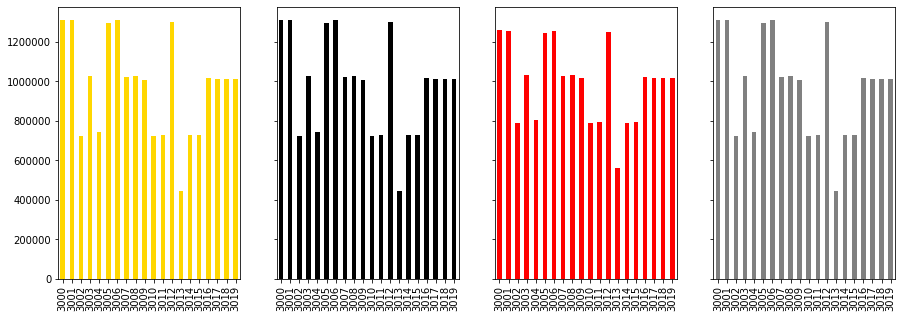

In [51]:
fig, axes = plt.subplots(1,4, sharey=True, figsize=(15,5))
house_test_data.Predicted_Price[0:20].plot(kind='bar', color='gold', ax=axes[0])
house_test_data.Lasso_Predicted[0:20].plot(kind='bar', color='black', ax=axes[1])
house_test_data.Ridge_Predicted[0:20].plot(kind='bar', color='red', ax=axes[2])
house_test_data.Bagg_Predicted[0:20].plot(kind='bar', color='gray', ax=axes[3])
plt.show()

----------------------

### Elastic Net:

In [52]:
from sklearn.linear_model import ElasticNet

In [53]:
net_model = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(x1,y1)
house_test_data['EN_Predicted'] = net_model.predict(x1)

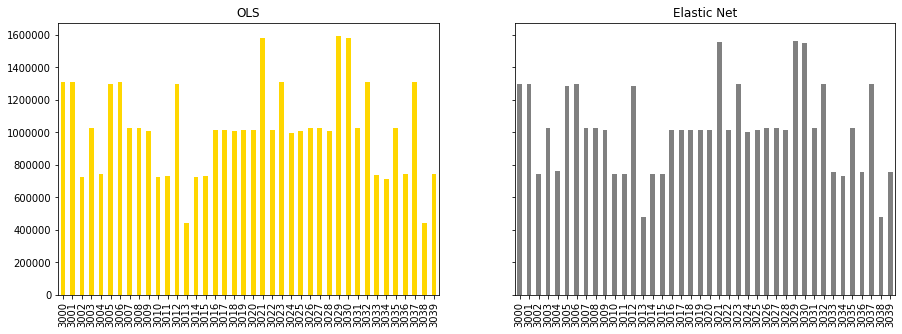

In [54]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
house_test_data.Predicted_Price[0:40].plot(kind='bar', color='gold', ax=axes[0],title='OLS')
house_test_data.EN_Predicted[0:40].plot(kind='bar', color='gray', ax=axes[1], title='Elastic Net')
plt.show()

In [55]:
import numpy as np
RMSE1 = np.sqrt(mean_squared_error(house_test.Price, house_test_data.Predicted_Price))
RMSE4 = np.sqrt(mean_squared_error(house_test.Price, house_test_data.EN_Predicted))
print('RMSE for OLS model =',RMSE1)
print('RMSE for Elastic-Net model =',RMSE4)

RMSE for OLS model = 550175.9084392181
RMSE for Elastic-Net model = 549349.9330354722


In [56]:
RMSE4 > RMSE3

True

Here we see the little same error rate in L2 Regularization and Elastic-Net, but still L2 gives a better accuracy. Still our eyes are on Ridge.

-----------------

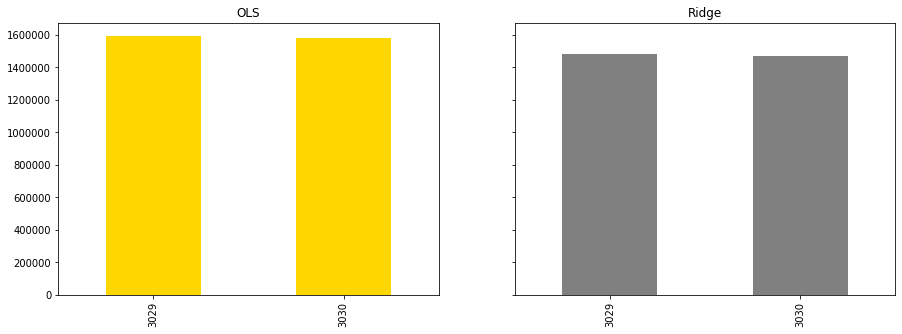

In [57]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
house_test_data.Predicted_Price[29:31].plot(kind='bar', color='gold', ax=axes[0], title='OLS')
house_test_data.Ridge_Predicted[29:31].plot(kind='bar', color='gray', ax=axes[1], title='Ridge')
plt.show()

`3029` and `3030` seems to be highest values.

`Elastic Net deals with the higher error. We see that, longer error values are managed.`

--------------------------

### Let's check the accuracy of the models:

In [58]:
house_test_data['Actual_Price'] = house_test.Price
predicted_data= house_test_data[['Predicted_Price', 'Lasso_Predicted',
       'Ridge_Predicted', 'Bagg_Predicted', 'EN_Predicted', 'Actual_Price']]

predicted_data.head()

,Predicted_Price,Lasso_Predicted,Ridge_Predicted,Bagg_Predicted,EN_Predicted,Actual_Price
3000,1.311961e+06,1.311926e+06,1.259817e+06,1.311971e+06,1.297189e+06,880000
3001,1.309370e+06,1.309346e+06,1.254953e+06,1.309364e+06,1.294557e+06,2905000
3002,7.248364e+05,7.248743e+05,7.894938e+05,7.248589e+05,7.420537e+05,1300000
3003,1.027568e+06,1.027549e+06,1.029479e+06,1.027585e+06,1.027849e+06,1302500
3004,7.419804e+05,7.419832e+05,8.042369e+05,7.419782e+05,7.580661e+05,1445000


`Just by the glance we see that Ridge and Elastic-Net is giving a little bit good prediction values.`

---------------

In [59]:
house_test.shape

(1766, 7)

In [60]:
house_test_data.shape

(1766, 15)

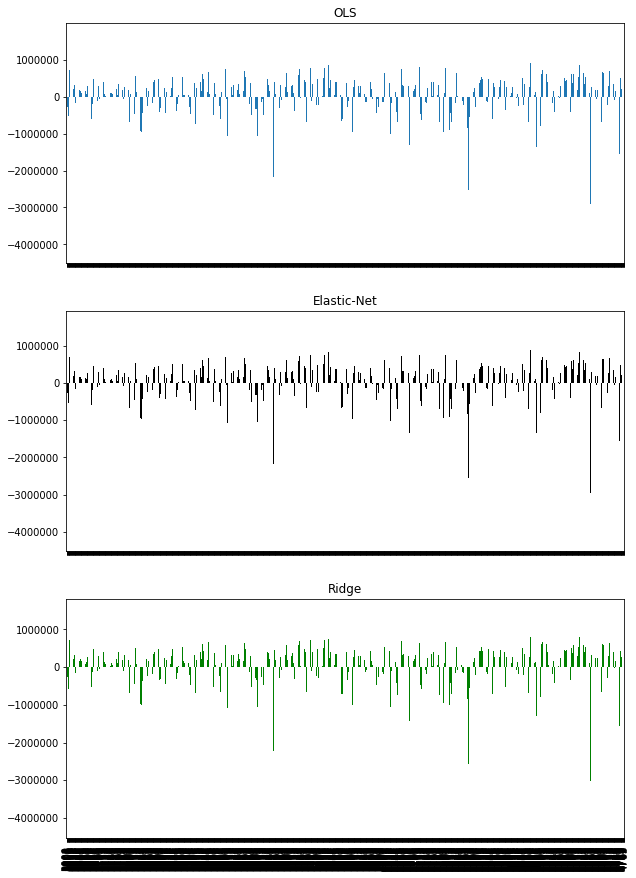

In [61]:
fig, axes = plt.subplots(3,1,sharex=True, figsize=(10,15))
(house_test_data.Predicted_Price - house_test.Price).plot(kind='bar', ax=axes[0], title='OLS')
(house_test_data.EN_Predicted - house_test.Price).plot(kind='bar', color='black', ax=axes[1], title='Elastic-Net')
(house_test_data.Ridge_Predicted - house_test.Price).plot(kind='bar', color='green', ax=axes[2], title='Ridge')
plt.show()

### We see here the respective errors in our predicted values. Higher the values (Error) are managed to do a good prediction.

### We see the similar values for each plot, but our error estimation has differentiated into the models.

### Still we see, the similar plots all over. According to the error estimation analysis (RMS-Calculation) we have observed the change, but by looking to the plots, we can conclude that, the errors are minorly balanced.

-----------------

### Let's differentiat the error values:
**How we are affected by different models.**

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
import numpy as np
RMSE = []
RMSE.append(np.sqrt(mean_squared_error(house_test.Price, house_test_data.Predicted_Price)))
RMSE.append(np.sqrt(mean_squared_error(house_test.Price, house_test_data.Lasso_Predicted)))
RMSE.append(np.sqrt(mean_squared_error(house_test.Price, house_test_data.Ridge_Predicted)))
RMSE.append(np.sqrt(mean_squared_error(house_test.Price, house_test_data.Bagg_Predicted)))
RMSE.append(np.sqrt(mean_squared_error(house_test.Price, house_test_data.EN_Predicted)))

In [64]:
pd.DataFrame({'Models':['OLS','Lasso','Ridge','Bagg','EN'], 'RMSE':RMSE}).sort_values(by='RMSE', ascending=False)

,Models,RMSE
0,OLS,550175.908439
1,Lasso,550174.040787
3,Bagg,550153.299027
4,EN,549349.933035
2,Ridge,549239.383044


`Final Conclusion:`
### Hence we conclude that, Ridge is giving quite good prediction other than that of all models.

--------------

#### Question: Which model do we prefer to predict the house prices?

According to `Occam's Razor` says, **Simplest models give the good accuracy**.

Hence we will see the low `RMSE` which will go to `less complexity` in the model which gives appropraite values.

Here we prefer `Elastic Net model` or `Ridge model` as our simplest and good model for prediction. 

-----------------------

-------------------------

# Model building with Feature Engineering

`Feature Engineering`

------------------------------------------------------------

### Will we get any benifit using encoding technique, to get more parameters?

In [65]:
house.columns

Index(['Rooms', 'Type', 'Price', 'Method', 'Regionname', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom'],
      dtype='object')

In [66]:
house2 = house.copy()

house2 = house2[['Rooms', 'Type', 'Price', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom']]

house2 = house2.iloc[:3000,:]

In [67]:
house2 = pd.get_dummies(data=house2, columns=['Type'], drop_first = True)
house2.head()

,Rooms,Price,Bathroom,Car,Landsize,Distance,Bedroom,Type_t,Type_u
0,3,1490000,1,1,126,25.2,2,0,0
1,3,1220000,1,1,202,21.8,2,0,0
2,3,1420000,1,0,156,21.7,2,0,0
3,3,1515000,2,1,0,18.8,3,0,0
4,2,670000,2,0,134,20.6,3,0,0


In [68]:
house2.columns

Index(['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Bedroom',
       'Type_t', 'Type_u'],
      dtype='object')

In [69]:
import statsmodels.formula.api as sm

sm_model_house2 = sm.ols('Price~Rooms+Bathroom+Car+Landsize+Distance+Bedroom+Type_t+Type_u', 
                  data = house2).fit()
sm_model_house2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     82.49
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          1.08e-123
Time:                        23:37:12   Log-Likelihood:                -44108.
No. Observations:                3000   AIC:                         8.823e+04
Df Residuals:                    2991   BIC:                         8.829e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.226e+05   7.97e+04      5.306      0.000    2.66e+05    5.79e+05
Rooms       2.393e+05   1.38e+04     17.326      0.000    2.12e+05    2.66e+05
Bathroom   -1.167e+04   1.47e+04     -0.796      0.426   -4.04e+04    1.71e+04
Car        -1.054e+04   1.25e+04     -0.845      0.398    -3.5e+04    1.39e+04
Landsize      -7.7142      7.419     -1.040      0.298     -22.260       6.832
Distance    -576.9496   2541.609     -0.227      0.820   -5560.428    4406.529
Bedroom    -7250.2919   9760.493     -0.743      0.458   -2.64e+04    1.19e+04
Type_t     -1.184e+05   3.69e+04     -3.212      0.001   -1.91e+05   -4.61e+04
Type_u     -1.924e+05   3.35e+04     -5.746      0.000   -2.58e+05   -1.27e+05
==============================================================================
Omnibus:                     1563.077   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14931.298
Skew:                           2.284   Prob(JB):                         0.00
Kurtosis:                      12.929   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Here we got a little bit good model of accuracy for the prediction with some more features.

In [70]:
house3 = house[['Rooms', 'Type','Method', 'Price', 'Bathroom', 'Car',
       'Landsize', 'Distance', 'Bedroom']]

house3 = house3.iloc[:3000, :]

In [71]:
house3.Method.unique()

array(['S', 'SP', 'VB', 'PI', 'SA'], dtype=object)

In [72]:
house3 = pd.get_dummies(data=house3, columns=['Type','Method'], drop_first = True)
house3.head()

,Rooms,Price,Bathroom,Car,Landsize,Distance,Bedroom,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
0,3,1490000,1,1,126,25.2,2,0,0,1,0,0,0
1,3,1220000,1,1,202,21.8,2,0,0,1,0,0,0
2,3,1420000,1,0,156,21.7,2,0,0,1,0,0,0
3,3,1515000,2,1,0,18.8,3,0,0,1,0,0,0
4,2,670000,2,0,134,20.6,3,0,0,1,0,0,0


In [73]:
house3.columns

Index(['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Bedroom',
       'Type_t', 'Type_u', 'Method_S', 'Method_SA', 'Method_SP', 'Method_VB'],
      dtype='object')

In [74]:
import statsmodels.formula.api as sm

sm_model_house3 = sm.ols('Price~Rooms+Bathroom+Car+Landsize+Distance+Bedroom+Type_t+Type_u+Method_S+Method_SA+Method_SP+Method_VB', 
                  data = house3).fit()
sm_model_house3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     60.80
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          3.25e-132
Time:                        23:37:12   Log-Likelihood:                -44079.
No. Observations:                3000   AIC:                         8.818e+04
Df Residuals:                    2987   BIC:                         8.826e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.534e+05   8.72e+04      6.349      0.000    3.83e+05    7.24e+05
Rooms       2.318e+05   1.37e+04     16.875      0.000    2.05e+05    2.59e+05
Bathroom   -1.413e+04   1.45e+04     -0.971      0.331   -4.27e+04    1.44e+04
Car        -1.369e+04   1.24e+04     -1.107      0.269   -3.79e+04    1.06e+04
Landsize      -7.9655      7.354     -1.083      0.279     -22.384       6.453
Distance    -630.3508   2519.636     -0.250      0.802   -5570.748    4310.046
Bedroom    -7935.7237   9679.915     -0.820      0.412   -2.69e+04     1.1e+04
Type_t     -1.317e+05   3.67e+04     -3.588      0.000   -2.04e+05   -5.97e+04
Type_u      -2.09e+05   3.33e+04     -6.271      0.000   -2.74e+05   -1.44e+05
Method_S   -9.833e+04    3.5e+04     -2.806      0.005   -1.67e+05   -2.96e+04
Method_SA  -9.104e+04   1.21e+05     -0.751      0.453   -3.29e+05    1.47e+05
Method_SP  -2.388e+05   4.33e+04     -5.515      0.000   -3.24e+05   -1.54e+05
Method_VB   8.353e+04   4.85e+04      1.723      0.085   -1.15e+04    1.79e+05
==============================================================================
Omnibus:                     1553.971   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14807.764
Skew:                           2.267   Prob(JB):                         0.00
Kurtosis:                      12.894   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Again we got at astonishing information that, we have increased our model accuracy with 4% level. Which shows that we could make it better for our prediction rather than using above data.

### NOTE:
**As much we consider the significant features into the model, we get a good accuracy in the model.**

In [75]:
import statsmodels.formula.api as sm

selected_model_house3 = sm.ols('Price~Rooms+Bathroom+Landsize+Bedroom+Type_t+Type_u+Method_S+Method_SA+Method_SP+Method_VB', 
                  data = house3).fit()
selected_model_house3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     72.85
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          8.42e-134
Time:                        23:37:13   Log-Likelihood:                -44080.
No. Observations:                3000   AIC:                         8.818e+04
Df Residuals:                    2989   BIC:                         8.825e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.274e+05    7.1e+04      7.424      0.000    3.88e+05    6.67e+05
Rooms       2.319e+05   1.37e+04     16.881      0.000    2.05e+05    2.59e+05
Bathroom   -1.938e+04   1.38e+04     -1.409      0.159   -4.63e+04    7592.632
Landsize      -8.5706      7.330     -1.169      0.242     -22.944       5.803
Bedroom    -8115.1224   9677.482     -0.839      0.402   -2.71e+04    1.09e+04
Type_t     -1.315e+05   3.67e+04     -3.584      0.000   -2.03e+05   -5.96e+04
Type_u     -2.095e+05   3.33e+04     -6.290      0.000   -2.75e+05   -1.44e+05
Method_S   -9.697e+04    3.5e+04     -2.769      0.006   -1.66e+05   -2.83e+04
Method_SA  -9.262e+04   1.21e+05     -0.764      0.445    -3.3e+05    1.45e+05
Method_SP  -2.374e+05   4.33e+04     -5.486      0.000   -3.22e+05   -1.53e+05
Method_VB   8.367e+04   4.85e+04      1.726      0.084   -1.14e+04    1.79e+05
==============================================================================
Omnibus:                     1554.653   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14804.493
Skew:                           2.269   Prob(JB):                         0.00
Kurtosis:                      12.892   Cond. No.                     1.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`As we had selected our features for the model simplicity. And we kept it into the model. Now we made our model, and we got a very good model (Not a good much, but better than that of all previous).`

--------------------

In [76]:
X2 = house3.drop('Price', axis=1) ; y2 = house3.Price

from sklearn.linear_model import ElasticNet
net_model_encoding = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X2,y2)
house3['EN_Predicted'] = net_model_encoding.predict(X2)

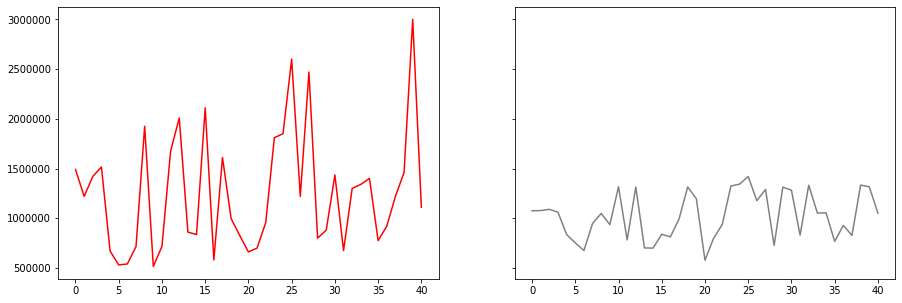

In [77]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
house3.Price[0:41].plot(kind='line', color='red', ax=axes[0])
house3.EN_Predicted[0:41].plot(kind='line', color='gray', ax=axes[1])
plt.show()

## OR

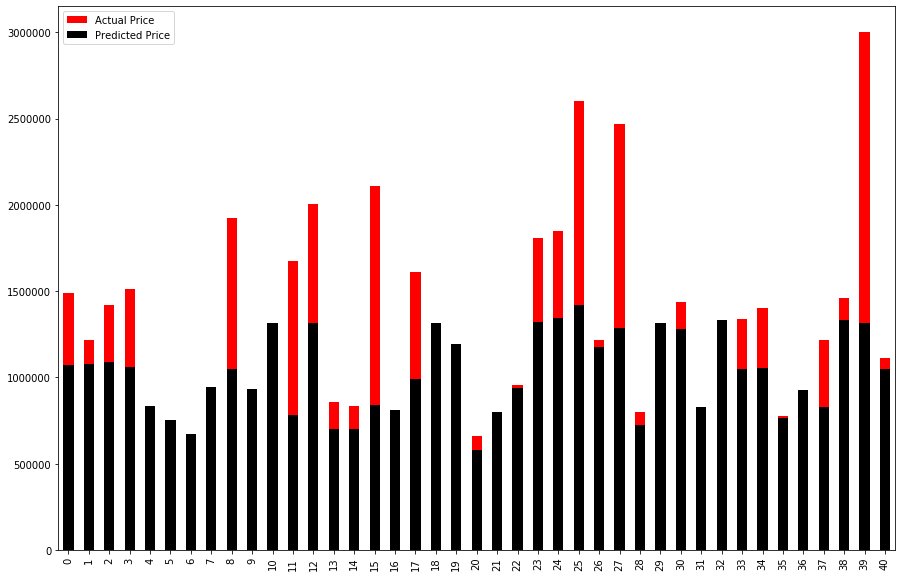

In [78]:
house3.Price[0:41].plot(kind='bar', color='red', label = 'Actual Price')
house3.EN_Predicted[0:41].plot(kind='bar', color='black', label = 'Predicted Price')
plt.legend()
plt.show()

`Awesome`

#### The error is reduced much for these features with Elastic Net model.

Refer above both plots.

-----------

In [79]:
house_test = house.iloc[3000:,:] # Previously created test set.
house_test_test = house_test.drop(['Price','Regionname'], axis=1)
house_test_test = pd.get_dummies(data = house_test_test, columns=['Type', 'Method'], drop_first = True)
house_test_test.head()

,Rooms,Bathroom,Car,Landsize,Distance,Bedroom,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
3000,4,1,1,245,17.4,4,0,0,1,0,0,0
3001,4,1,2,590,21.4,1,0,0,1,0,0,0
3002,2,2,2,602,20.9,2,0,1,1,0,0,0
3003,3,1,1,172,18.6,2,1,0,1,0,0,0
3004,2,1,2,258,25.3,3,0,0,1,0,0,0


In [80]:
X2 = house3.drop(['Price','EN_Predicted'], axis=1) ; y2 = house3.Price

from sklearn.linear_model import ElasticNet
net_model_test = ElasticNet(alpha=0.1, l1_ratio=0.5).fit(X2,y2)
house_test_test['EN_Predicted'] = net_model_test.predict(house_test_test)

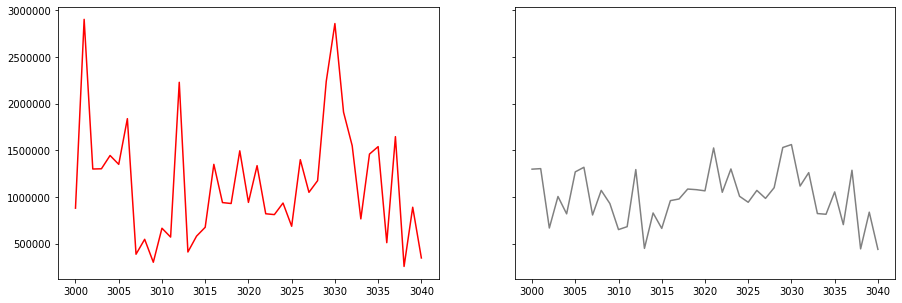

In [81]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
house_test.Price[0:41].plot(kind='line', color='red', ax=axes[0])
house_test_test['EN_Predicted'][0:41].plot(kind='line', color='gray', ax=axes[1])
plt.show()

## OR

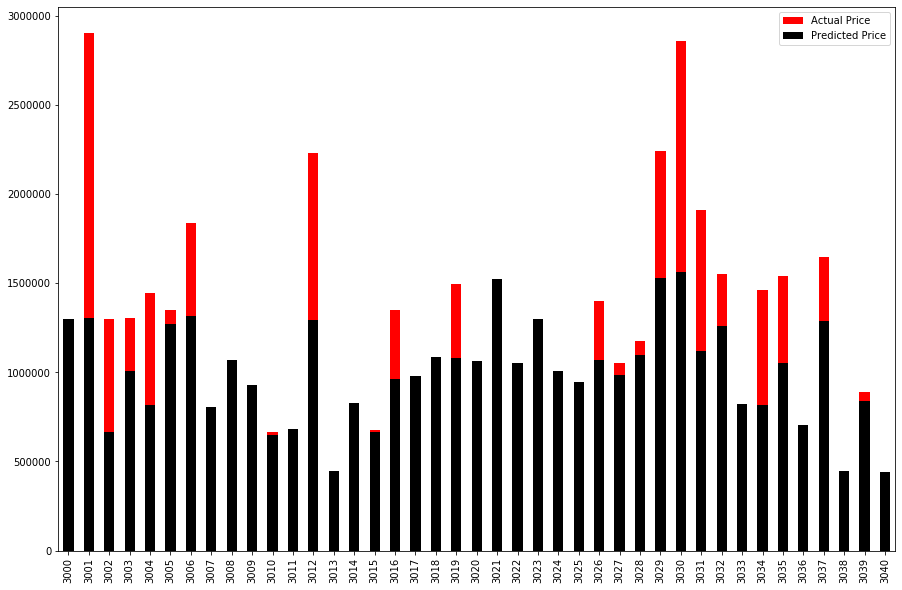

In [82]:
house_test.Price[0:41].plot(kind='bar', color='red', label= 'Actual Price')
house_test_test['EN_Predicted'][0:41].plot(kind='bar', color='black', label = 'Predicted Price')
plt.legend()
plt.show()

**Quite closer values**

-----------------

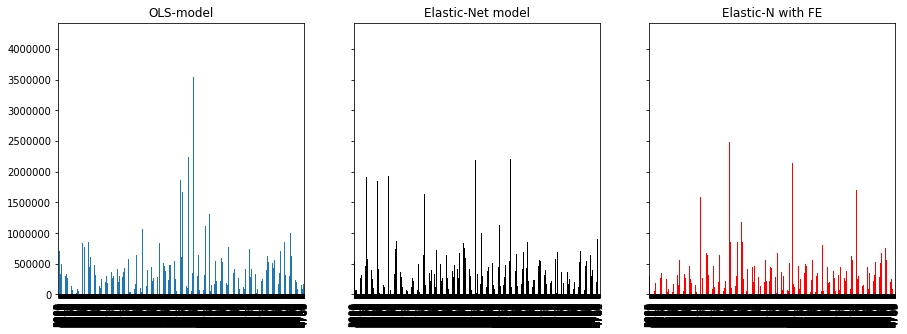

In [83]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,5))
abs(house_test_data.Predicted_Price - house_test.Price).plot(kind='bar', ax=axes[0], title='OLS-model')
abs(house_test_data.EN_Predicted - house_test.Price).plot(kind='bar', color='black', ax=axes[1], title='Elastic-Net model')
abs(house_test_test.EN_Predicted - house_test.Price).plot(kind='bar', color='red', ax=axes[2], title='Elastic-N with FE')
plt.show()

`Now here we are quite satisfied with all our algorithms, we predicted our house price values. If we compare above values with another features, we got high errors for both training and testing which was leading of underfitting the model. But now we see at least a good values in less error compared to before predictions.`

`Still we have less accuracy because our model demands for 19% of accuracy.`

-----------------

Let's transform oour data, we will see whether we get accuracy or not.

In [84]:
house_train.head()

,Rooms,Price,Bathroom,Car,Landsize,Distance,Bedroom
0,3,1490000,1,1,126,25.2,2
1,3,1220000,1,1,202,21.8,2
2,3,1420000,1,0,156,21.7,2
3,3,1515000,2,1,0,18.8,3
4,2,670000,2,0,134,20.6,3


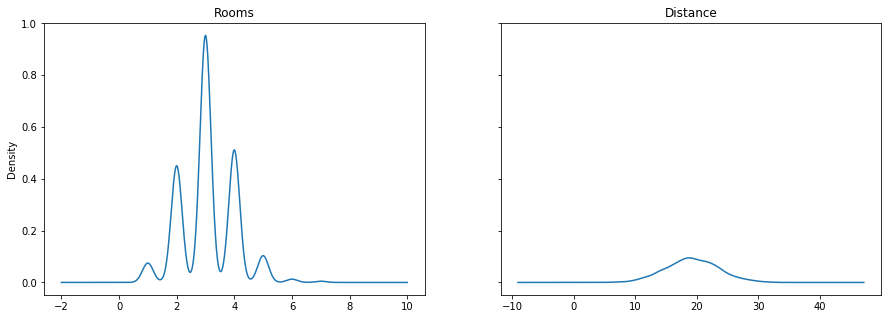

In [85]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
house_train.Rooms.plot(kind='kde', ax=axes[0], title='Rooms')
house_train.Distance.plot(kind='kde', ax=axes[1], title='Distance')
plt.show()

In [86]:
house_train_train = house_train.drop(['Landsize','Car'], axis=1)
house_train_train.head()

,Rooms,Price,Bathroom,Distance,Bedroom
0,3,1490000,1,25.2,2
1,3,1220000,1,21.8,2
2,3,1420000,1,21.7,2
3,3,1515000,2,18.8,3
4,2,670000,2,20.6,3


In [87]:
house_train_train.describe()

,Rooms,Price,Bathroom,Distance,Bedroom
count,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,3.083667,1.040372e+06,1.606000,19.271167,3.014000
std,0.936817,6.492741e+05,0.777795,4.228746,1.101609
min,1.000000,1.700000e+05,0.000000,5.000000,0.000000
25%,3.000000,6.200000e+05,1.000000,16.500000,2.000000
50%,3.000000,8.550000e+05,1.000000,19.200000,3.000000
75%,4.000000,1.275000e+06,2.000000,22.100000,4.000000
max,7.000000,6.240000e+06,12.000000,33.100000,30.000000


In [88]:
import statsmodels.formula.api as sm

ols_model1 = sm.ols('Price~Bedroom+Distance+Bathroom+Rooms', 
                  data = house_train_train).fit()
ols_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          1.27e-119
Time:                        23:38:27   Log-Likelihood:                -44127.
No. Observations:                3000   AIC:                         8.826e+04
Df Residuals:                    2995   BIC:                         8.829e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.239e+05   7.29e+04      3.071      0.002     8.1e+04    3.67e+05
Bedroom    -7743.2800   9814.254     -0.789      0.430    -2.7e+04    1.15e+04
Distance    -708.2111   2555.792     -0.277      0.782   -5719.497    4303.075
Bathroom   -1.529e+04   1.39e+04     -1.100      0.272   -4.26e+04     1.2e+04
Rooms       2.847e+05   1.15e+04     24.655      0.000    2.62e+05    3.07e+05
==============================================================================
Omnibus:                     1554.511   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14411.961
Skew:                           2.279   Prob(JB):                         0.00
Kurtosis:                      12.722   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
house_train_train['Distance'] = house_train_train.Distance/4

In [90]:
import statsmodels.formula.api as sm

ols_model2 = sm.ols('Price~Bedroom+Distance+Bathroom+Rooms', 
                  data = house_train_train).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     153.5
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          1.27e-119
Time:                        23:38:28   Log-Likelihood:                -44127.
No. Observations:                3000   AIC:                         8.826e+04
Df Residuals:                    2995   BIC:                         8.829e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.239e+05   7.29e+04      3.071      0.002     8.1e+04    3.67e+05
Bedroom    -7743.2800   9814.254     -0.789      0.430    -2.7e+04    1.15e+04
Distance   -2832.8442   1.02e+04     -0.277      0.782   -2.29e+04    1.72e+04
Bathroom   -1.529e+04   1.39e+04     -1.100      0.272   -4.26e+04     1.2e+04
Rooms       2.847e+05   1.15e+04     24.655      0.000    2.62e+05    3.07e+05
==============================================================================
Omnibus:                     1554.511   Durbin-Watson:                   1.425
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14411.961
Skew:                           2.279   Prob(JB):                         0.00
Kurtosis:                      12.722   Cond. No.                         46.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
import statsmodels.formula.api as sm

ols_model2 = sm.ols('Price~Rooms', 
                  data = house_train_train).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     612.4
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          3.44e-123
Time:                        23:38:28   Log-Likelihood:                -44128.
No. Observations:                3000   AIC:                         8.826e+04
Df Residuals:                    2998   BIC:                         8.827e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.602e+05   3.72e+04      4.308      0.000    8.73e+04    2.33e+05
Rooms       2.854e+05   1.15e+04     24.747      0.000    2.63e+05    3.08e+05
==============================================================================
Omnibus:                     1553.720   Durbin-Watson:                   1.423
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14367.388
Skew:                           2.279   Prob(JB):                         0.00
Kurtosis:                      12.704   Cond. No.                         12.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**All above models are showing that, if we thou we remove unnecessery features or keep it so, it does not give a good accuracy. It remains same for all time. But if we do some feature enigineerign, we get a good accuracy of approximately 20%** 

Refer sm_model_house3...

`WE SHALL HAVE TO APPROACH SOME OTHER TECHNIQUES...`

# END